This notebook illustrates the use of a subclass of `CatalogDBObject` for accessing tables of SN parameters on the fatboy database.

In [1]:
# generic python imports
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches  as mpatches
import matplotlib
# Used to make plots a little nicer but not really required
import seaborn as sns
sns.set()

/usr/local/miniconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
from lsst.sims.catalogs.db import CatalogDBObject

In [3]:
import lsst.sims.catUtils.baseCatalogModels as bcm
from lsst.sims.catalogs.definitions import InstanceCatalog
from lsst.sims.utils import ObservationMetaData

/Users/rbiswas/src/LSST_el_Capitan/sims_catalogs/python/lsst/sims/catalogs/db/dbConnection.py:439: UserWarning: Duplicate object type id 25 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
  'want globally unique id values')
/Users/rbiswas/src/LSST_el_Capitan/sims_catalogs/python/lsst/sims/catalogs/db/dbConnection.py:439: UserWarning: Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
  'want globally unique id values')


In [4]:
#from lsst.sims.catUtils.baseCatalogModels import GalaxyTileObj, GalaxyDiskObj
#from lsst.sims.catUtils.baseCatalogModels import SNObj
#from lsst.sims.catUtils.mixins import FrozenSNCat

In [5]:
from lsst.sims.catUtils.baseCatalogModels import SNDBObj
from lsst.sims.catUtils.mixins import FrozenSNCat

In [6]:
s = SNDBObj(table='TwinkSN')

In [7]:
type(s)

lsst.sims.catUtils.baseCatalogModels.snModels.SNDBObj

In [8]:
issubclass(SNDBObj, CatalogDBObject)

True

In [9]:
isinstance(s, CatalogDBObject)

True

Thus we can examine the columns of `s` like any other `CatalogDBObject` instance

In [10]:
s.columns

[('raJ2000', 'snra*PI()/180.'),
 ('decJ2000', 'sndec*PI()/180.'),
 ('Tt0', 't0'),
 ('Tx0', 'x0'),
 ('Tx1', 'x1'),
 ('Tc', 'c'),
 ('Tsnid', 'id'),
 ('Tredshift', 'redshift'),
 ('Tgaltileid', 'galtileid'),
 ('galtileid', 'galtileid', int),
 ('htmid', 'htmid', int),
 ('id', 'id', int),
 ('t0', 't0', float),
 ('c', 'c', float),
 ('x1', 'x1', float),
 ('x0', 'x0', float),
 ('redshift', 'redshift', float),
 ('snra', 'snra', float),
 ('sndec', 'sndec', float),
 ('cx', 'cx', float),
 ('cy', 'cy', float),
 ('cz', 'cz', float)]

In [11]:
possible_aliases = list(t[0] for t in s.columns)
print(possible_aliases)

['raJ2000', 'decJ2000', 'Tt0', 'Tx0', 'Tx1', 'Tc', 'Tsnid', 'Tredshift', 'Tgaltileid', 'galtileid', 'htmid', 'id', 't0', 'c', 'x1', 'x0', 'redshift', 'snra', 'sndec', 'cx', 'cy', 'cz']


This list contains pairs of tuples. The first elements of each tuple collected in `possible_aliases` above are variables that may be accessed from each instance of `SNObj`

In [12]:
fatboy_columns = set(t[1] for t in s.columns)
print(list(fatboy_columns))

['snra', 'c', 'sndec*PI()/180.', 'redshift', 'snra*PI()/180.', 'galtileid', 't0', 'cz', 'cy', 'cx', 'sndec', 'htmid', 'x0', 'x1', 'id']


This list consists of column names on fatboy

In [13]:
s2  = SNDBObj(table='TwinkSNKraken')

In [14]:
s2.columns

[('raJ2000', 'snra*PI()/180.'),
 ('decJ2000', 'sndec*PI()/180.'),
 ('Tt0', 't0'),
 ('Tx0', 'x0'),
 ('Tx1', 'x1'),
 ('Tc', 'c'),
 ('Tsnid', 'id'),
 ('Tredshift', 'redshift'),
 ('Tgaltileid', 'galtileid'),
 ('galtileid', 'galtileid', int),
 ('htmid', 'htmid', int),
 ('id', 'id', int),
 ('t0', 't0', float),
 ('c', 'c', float),
 ('x1', 'x1', float),
 ('x0', 'x0', float),
 ('redshift', 'redshift', float),
 ('snra', 'snra', float),
 ('sndec', 'sndec', float),
 ('cx', 'cx', float),
 ('cy', 'cy', float),
 ('cz', 'cz', float)]

## Instance Catalogs with SNObj

In [15]:
from lsst.sims.catUtils.utils import ObservationMetaDataGenerator

In [16]:
degConv = np.array([1., 1./60., 1./3600.])
raConv = degConv / 24.0 * 360.
centralRA = np.dot(np.array([3., 32., 30]), raConv) #03h 32m 30s
centralDec = np.dot(np.array([-28, 6., 0.]), degConv)
patchRadius = 0.4 * np.sqrt(2) #np.dot(np.array([0.0, 10.0, 0.]), degConv)

In [17]:
opsimPath = os.path.join('/Users/rbiswas/data/LSST/OpSimData')
opsimDB = os.path.join(opsimPath,'enigma_1189_sqlite.db')

In [18]:
generator = ObservationMetaDataGenerator(driver='sqlite', database=opsimDB) #database = opsimPath, driver='sqlite')
obsMetaDataResults = generator.getObservationMetaData(limit=1000,
                                                      fieldRA=(centralRA - 2.0, centralRA + 2.0), 
                                                      fieldDec=(centralDec - 2.0, centralDec + 2.0),
                                                      expMJD=(49500., 49690.),
                                                      boundLength=0.05,
                                                      boundType='circle')

In [19]:
[(obsMetaDataResults.index(x), x.mjd.TAI) for x in obsMetaDataResults if x.bandpass == 'r']

[(25, 49612.338296000002),
 (26, 49612.338712999997),
 (27, 49612.339129),
 (28, 49612.339546000003),
 (29, 49612.339962999999),
 (30, 49612.340379000001),
 (31, 49612.340795999997),
 (32, 49612.341213),
 (33, 49612.341629000002),
 (34, 49612.342045999998),
 (35, 49612.342463000001),
 (36, 49612.342879000003),
 (37, 49612.343295999999),
 (38, 49612.343713000002),
 (39, 49612.344128999997),
 (40, 49612.344546),
 (41, 49612.344963000003),
 (42, 49612.345378999999),
 (43, 49612.345796000001),
 (44, 49612.363574000003),
 (121, 49623.236642000003),
 (122, 49623.237057999999),
 (123, 49623.237475000002),
 (124, 49623.237891999997),
 (125, 49623.238308),
 (126, 49623.238725000003),
 (127, 49623.239141999999),
 (128, 49623.239558000001),
 (129, 49623.239974999997),
 (130, 49623.240392),
 (131, 49623.240808000002),
 (132, 49623.241224999998),
 (133, 49623.241642000001),
 (134, 49623.242058000003),
 (135, 49623.242474999999),
 (136, 49623.242892000002),
 (137, 49623.243307999997),
 (138, 49623.2

In [20]:
TwinklesObsMetaDataSmall = obsMetaDataResults[35]
TwinklesObsMetaDataSmall2 = obsMetaDataResults[145]
TwinklesObsMetaDataSmall3 = obsMetaDataResults[390]

In [21]:
print (TwinklesObsMetaDataSmall.pointingRA, TwinklesObsMetaDataSmall2.pointingRA, TwinklesObsMetaDataSmall3.pointingRA)

(53.009138473031555, 53.009138473031555, 53.009138473031555)


####  Instance Catalogs Showing the tables on the Database

In [22]:
class TSNCopy(InstanceCatalog):
    
    column_outputs = ['raJ2000', 'decJ2000', 'id', 'Tgaltileid','Tt0', 'Tx0', 'Tx1', 'Tc', 'Tredshift', ]
    override_formats = {'raJ2000': '%8e', 'decJ2000': '%8e', 'x0':'%8e'}

In [23]:
Ttsmall = TSNCopy(db_obj=s, obs_metadata=TwinklesObsMetaDataSmall)
Ttsmall.write_catalog('TTwinklesSN.dat')

In [24]:
TTSNdf = pd.read_csv('TTwinklesSN.dat', sep=',\s+')

/usr/local/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [25]:
TTSNdf.head()

,#raJ2000,decJ2000,id,Tgaltileid,Tt0,Tx0,Tx1,Tc,Tredshift
0,0.924869,-0.479665,6000005211701,6.000005e+10,1458.2762,0.0,0.2415,-0.0370,0.7080
1,0.924917,-0.479692,6000035145300,6.000035e+10,3497.6771,0.0,0.0199,0.0572,0.8491
2,0.924917,-0.479693,6000035145315,6.000035e+10,11.8677,0.0,-0.3470,-0.0993,0.8491
3,0.924917,-0.479698,6000035145310,6.000035e+10,3156.4636,0.0,-0.7167,-0.1043,0.8491
4,0.924915,-0.479698,6000035145308,6.000035e+10,1377.2543,0.0,-0.6872,0.0519,0.8491


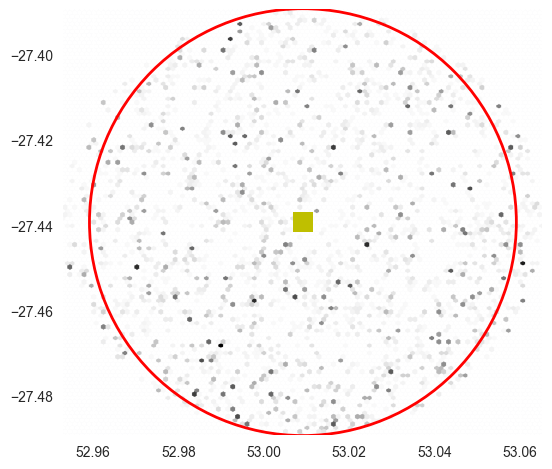

In [26]:
fig, ax = plt.subplots()
ax.hexbin(np.degrees(TTSNdf['#raJ2000']), np.degrees(TTSNdf.decJ2000))
ax.plot(TwinklesObsMetaDataSmall.pointingRA, TwinklesObsMetaDataSmall.pointingDec, 
         'ys', markersize=14)
circ = mpatches.Circle((TwinklesObsMetaDataSmall.pointingRA, TwinklesObsMetaDataSmall.pointingDec), 
         0.05)
circ.set(edgecolor='r', fill=False, lw=2)
#circ.set(face)
ax.add_artist(circ)
ax.set_aspect('equal')
y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
ax.yaxis.set_major_formatter(y_formatter)
#sns.despine()

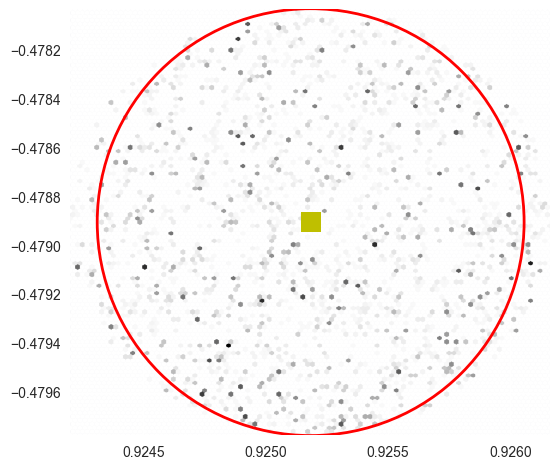

In [27]:
fig, ax = plt.subplots()
ax.hexbin(TTSNdf['#raJ2000'], TTSNdf.decJ2000)
ax.plot(np.radians(TwinklesObsMetaDataSmall.pointingRA), np.radians(TwinklesObsMetaDataSmall.pointingDec), 
         'ys', markersize=14)
circ = mpatches.Circle((np.radians(TwinklesObsMetaDataSmall.pointingRA), np.radians(TwinklesObsMetaDataSmall.pointingDec)), 
         np.radians(0.05))
circ.set(edgecolor='r', fill=False, lw=2)
#circ.set(face)
ax.add_artist(circ)
ax.set_aspect('equal')

##  SN Instance Catalogs

In [28]:
s.get_column_names('TwinkSN')

['galtileid',
 'htmid',
 'id',
 't0',
 'c',
 'x1',
 'x0',
 'redshift',
 'snra',
 'sndec',
 'cx',
 'cy',
 'cz']

In [29]:
s.get_column_names('TwinkSNKraken')

['galtileid',
 'htmid',
 'id',
 't0',
 'c',
 'x1',
 'x0',
 'redshift',
 'snra',
 'sndec',
 'cx',
 'cy',
 'cz']

In [30]:
s.getIdColKey()

'id'

In [31]:
s.show_db_columns()

galtileid -- BIGINT
htmid -- BIGINT
id -- BIGINT
t0 -- FLOAT
c -- FLOAT
x1 -- FLOAT
x0 -- FLOAT
redshift -- FLOAT
snra -- FLOAT
sndec -- FLOAT
cx -- FLOAT
cy -- FLOAT
cz -- FLOAT


In [32]:
sncatalog = FrozenSNCat(db_obj=s, obs_metadata=TwinklesObsMetaDataSmall, 
                         column_outputs=['snra', 'galtileid', 'sndec', 'snid', 'x0', 't0', 'flux', 'flux_err', 'mag', 'mag_err',
                                         'TmagNorm', 'TsedFilepath', 'adu'])
sncatalog.surveyStartDate = 49500.
sncatalog.writeSedFile = True
sncatalog.prefix = '/tmp/phosim_cat_'

In [33]:
sncatalog.suppressDimSN

True

In [34]:
sncatalog.suppressHighzSN

True

In [35]:
sncatalog.write_catalog('/tmp/sncat.dat')

In [36]:
!head /tmp/sncat.dat

#snid, snra, sndec, z, t0, c, x1, x0, galtileid, flux, flux_err, mag, mag_err, TmagNorm, TsedFilepath, adu
6000134534807.0000, 9.249009e-01, -4.796603e-01, 0.8308, 49634.4989, -4.487114e-03, 0.4750, 2.808300e-06, 60001345348, 3.873175e-11, 3.681015e-11, 26.0298, 7.253192e-01, 25.8191, /tmp/phosim_cat_specFile_6000134534807_49612.3425_r.dat, 90.0223
6000134534803.0000, 9.249005e-01, -4.796599e-01, 0.8308, 49622.7228, 1.428843e-01, -1.3618, 1.618702e-06, 60001345348, 4.591798e-11, 3.682841e-11, 25.8450, 6.394352e-01, 25.3560, /tmp/phosim_cat_specFile_6000134534803_49612.3425_r.dat, 106.7249
6000166844111.0000, 9.249629e-01, -4.797319e-01, 0.8669, 49575.7365, -3.970874e-03, -0.7924, 3.259538e-06, 60001668441, 1.504787e-11, 3.674992e-11, 27.0563, 1.342100e+00, 25.7384, /tmp/phosim_cat_specFile_6000166844111_49612.3425_r.dat, 34.9750
6000038455704.0000, 9.247567e-01, -4.796392e-01, 0.6390, 49552.2699, -1.247955e-01, -0.4213, 8.927580e-06, 60000384557, 3.525994e-11, 3.680133e-11, 26.1318, 7.

In [37]:
!ls /tmp/

com.apple.launchd.ZOEawwYZib
com.apple.launchd.pbsi3RvQie
com.apple.launchd.uHMJWQpR7i
ct.shutdown
phosim_cat_specFile_6000000549201_49612.3425_r.dat
phosim_cat_specFile_6000002425203_49612.3425_r.dat
phosim_cat_specFile_6000005422702_49612.3425_r.dat
phosim_cat_specFile_6000008189004_49612.3425_r.dat
phosim_cat_specFile_6000009259001_49612.3425_r.dat
phosim_cat_specFile_6000011378201_49612.3425_r.dat
phosim_cat_specFile_6000013319703_49612.3425_r.dat
phosim_cat_specFile_6000015342700_49612.3425_r.dat
phosim_cat_specFile_6000018457105_49612.3425_r.dat
phosim_cat_specFile_6000020379900_49612.3425_r.dat
phosim_cat_specFile_6000024404501_49612.3425_r.dat
phosim_cat_specFile_6000025771801_49612.3425_r.dat
phosim_cat_specFile_6000033688200_49612.3425_r.dat
phosim_cat_specFile_6000033906500_49612.3425_r.dat
phosim_cat_specFile_6000033906502_49612.3425_r.dat
phosim_cat_specFile_6000033906503_49612.3425_r.dat
phosim_cat_specFile_6000033906504_49612.3425_r.dat
phosim_cat_specFile_6000038455704_

In [38]:
df = pd.DataFrame(np.genfromtxt('/tmp/phosim_cat_specFile_6000000549201_49612.3425_r.dat', names=True))

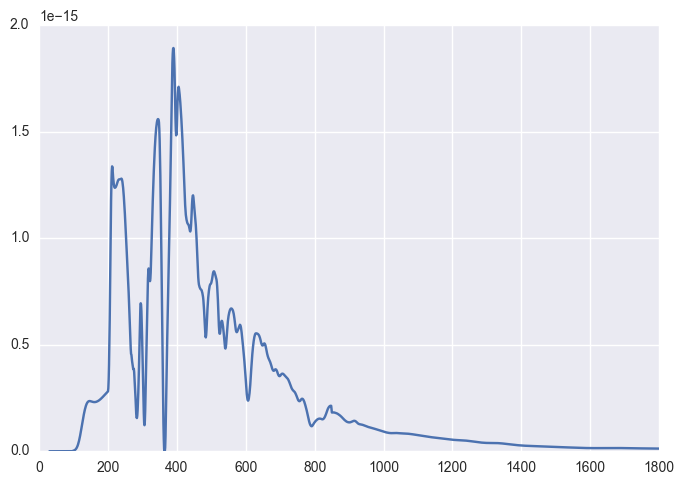

In [39]:
plt.plot(df.Wavelengthnm, df.Flambdaergscmssnm)

##  PhoSim Catalogs

In [40]:
from lsst.sims.catUtils.exampleCatalogDefinitions.phoSimCatalogExamples import PhoSimCatalogSN, PhoSimCatalogSersic2D, DefaultPhoSimHeaderMap

In [53]:
pc = PhoSimCatalogSN(db_obj=s, obs_metadata=TwinklesObsMetaDataSmall)
pc.phoSimHeaderMap = DefaultPhoSimHeaderMap
pc.writeSedFile = True
pc.surveyStartDate = 49500
pc.suppressDimSN = True

In [54]:
pc.write_catalog('SNOnlyPhoSimCatalog.dat')

In [62]:
!head -n 20 SNOnlyPhoSimCatalog.dat

rightascension 53.0091385
declination -27.4389488
mjd 49612.3426540
altitude 85.1694000
azimuth 55.8104932
filter 2
rotskypos 104.5218831
dist2moon 84.8086399
moonalt 9.1349526
moondec -7.9876619
moonphase 93.3973720
moonra 324.7335707
nsnap 2
obshistid 203492
seed 203492
seeing 0.4847630
sunalt -31.9914423
vistime 33.0000000
object 6144281204838442 52.9902617 -27.4795586 26.3389007 specFile_6000274614100_49612.3425_r.dat 0.8928 0 0 0 0 0 point none CCM 0.0268207575 3.1
object 6144093910125610 52.988212 -27.4756134 26.1765682 specFile_6000091709107_49612.3425_r.dat 0.8797 0 0 0 0 0 point none CCM 0.0281195858 3.1


In [56]:
['trash', 'uniqueId', 'ra', 'dec', 'magNorm', 'specFileName', 'z']

['trash', 'uniqueId', 'ra', 'dec', 'magNorm', 'specFileName', 'z']

In [71]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal='.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=False, error_bad_lines=True, warn_bad_lines=True, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=False, compact_ints=False, use_unsigned=False, low_memory=True, buffer_lines=None, memory_map=False, float_precision=

In [79]:
df = pd.read_csv('SNOnlyPhoSimCatalog.dat', comment='object')

ValueError: Only length-1 comment characters supported

In [88]:
from itertools import islice

In [97]:
DefaultPhoSimHeaderMap

{'dist2moon': ('dist2Moon', <ufunc 'degrees'>),
 'moonalt': ('moonAlt', <ufunc 'degrees'>),
 'moondec': ('moonDec', <ufunc 'degrees'>),
 'moonphase': ('moonPhase', None),
 'moonra': ('moonRA', <ufunc 'degrees'>),
 'nsnap': 2,
 'obshistid': ('obsHistID', None),
 'rottelpos': ('rotTelPos', <ufunc 'degrees'>),
 'seed': ('obsHistID', None),
 'seeing': ('rawSeeing', None),
 'sunalt': ('sunAlt', <ufunc 'degrees'>),
 'vistime': ('visitExpTime',
  <function lsst.sims.catUtils.exampleCatalogDefinitions.phoSimCatalogExamples.<lambda>>)}

In [104]:

from numbers import Number

In [111]:
from collections import OrderedDict as odict

In [112]:
def metadataForPhoSimCatalog(phosimcatalogFile):
    
    with open(phosimcatalogFile, 'r') as f:
        metadata = odict(next(f)[:-1].split() for _ in range(18))
        for key in metadata:
            val = metadata[key]
            try:
                metadata[key] = int(val)
            except:
                metadata[key] = float(val)
        return (metadata['obshistid'], metadata)

In [113]:

metadataForPhoSimCatalog('SNOnlyPhoSimCatalog.dat')

(203492,
 OrderedDict([('rightascension', 53.0091385),
              ('declination', -27.4389488),
              ('mjd', 49612.342654),
              ('altitude', 85.1694),
              ('azimuth', 55.8104932),
              ('filter', 2),
              ('rotskypos', 104.5218831),
              ('dist2moon', 84.8086399),
              ('moonalt', 9.1349526),
              ('moondec', -7.9876619),
              ('moonphase', 93.397372),
              ('moonra', 324.7335707),
              ('nsnap', 2),
              ('obshistid', 203492),
              ('seed', 203492),
              ('seeing', 0.484763),
              ('sunalt', -31.9914423),
              ('vistime', 33.0)]))

In [86]:
lines

['rightascension 53.0091385\n',
 'declination -27.4389488\n',
 'mjd 49612.3426540\n',
 'altitude 85.1694000\n',
 'azimuth 55.8104932\n',
 'filter 2\n',
 'rotskypos 104.5218831\n',
 'dist2moon 84.8086399\n',
 'moonalt 9.1349526\n',
 'moondec -7.9876619\n',
 'moonphase 93.3973720\n',
 'moonra 324.7335707\n',
 'nsnap 2\n',
 'obshistid 203492\n',
 'seed 203492\n',
 'seeing 0.4847630\n',
 'sunalt -31.9914423\n',
 'vistime 33.0000000\n',
 'object 6144281204838442 52.9902617 -27.4795586 26.3389007 specFile_6000274614100_49612.3425_r.dat 0.8928 0 0 0 0 0 point none CCM 0.0268207575 3.1\n',
 'object 6144093910125610 52.988212 -27.4756134 26.1765682 specFile_6000091709107_49612.3425_r.dat 0.8797 0 0 0 0 0 point none CCM 0.0281195858 3.1\n',
 'object 6144995563212842 52.9959883 -27.4702341 23.517131 specFile_6000972229700_49612.3425_r.dat 0.6213 0 0 0 0 0 point none CCM 0.0281195858 3.1\n',
 'object 6144171067700266 52.9939513 -27.473566 26.2112335 specFile_6000167058301_49612.3425_r.dat 0.849 0 

In [81]:
df = pd.read_csv('SNOnlyPhoSimCatalog.dat', skiprows=18, delim_whitespace=True, names=pc.column_outputs,
                 float_precision='high')

In [115]:
df.columns

Index([u'prefix', u'uniqueId', u'raPhoSim', u'decPhoSim', u'phoSimMagNorm',
       u'sedFilepath', u'redshift', u'shear1', u'shear2', u'kappa',
       u'raOffset', u'decOffset', u'spatialmodel', u'internalExtinctionModel',
       u'galacticExtinctionModel', u'galacticAv', u'galacticRv'],
      dtype='object')

In [118]:
df.phoSimMagNorm

count     218.000000
mean       30.198514
std        66.052976
min        19.351424
25%        24.620550
50%        25.443286
75%        26.552175
max      1000.000000
Name: phoSimMagNorm, dtype: float64

In [116]:
df[['redshift', 'phoSimMagNorm']]

,redshift,phoSimMagNorm
0,0.8928,26.338901
1,0.8797,26.176568
2,0.6213,23.517131
3,0.8490,26.211233
4,0.8932,26.265099
5,0.6092,25.779852
6,0.8730,25.294331
7,0.8730,26.211087
8,0.4061,25.045150
9,0.6390,25.955010


In [70]:
df

,prefix,uniqueId,raPhoSim,decPhoSim,phoSimMagNorm,sedFilepath,redshift,shear1,shear2,kappa,raOffset,decOffset,spatialmodel,internalExtinctionModel,galacticExtinctionModel,galacticAv,galacticRv
0,object,6144281204838442,52.990262,-27.479559,26.338901,specFile_6000274614100_49612.3425_r.dat,0.8928,0,0,0,0,0,point,none,CCM,0.026821,3.1
1,object,6144093910125610,52.988212,-27.475613,26.176568,specFile_6000091709107_49612.3425_r.dat,0.8797,0,0,0,0,0,point,none,CCM,0.028120,3.1
2,object,6144995563212842,52.995988,-27.470234,23.517131,specFile_6000972229700_49612.3425_r.dat,0.6213,0,0,0,0,0,point,none,CCM,0.028120,3.1
3,object,6144171067700266,52.993951,-27.473566,26.211233,specFile_6000167058301_49612.3425_r.dat,0.8490,0,0,0,0,0,point,none,CCM,0.027951,3.1
4,object,6145532174336042,53.033894,-27.418111,26.265099,specFile_6001496264000_49612.3425_r.dat,0.8932,0,0,0,0,0,point,none,CCM,0.027768,3.1
5,object,6144051719065642,53.034351,-27.419727,25.779852,specFile_6000050506900_49612.3425_r.dat,0.6092,0,0,0,0,0,point,none,CCM,0.027768,3.1
6,object,6145409577784362,53.029889,-27.416153,25.294331,specFile_6001376540805_49612.3425_r.dat,0.8730,0,0,0,0,0,point,none,CCM,0.027768,3.1
7,object,6145409577780266,53.029945,-27.416159,26.211087,specFile_6001376540801_49612.3425_r.dat,0.8730,0,0,0,0,0,point,none,CCM,0.027768,3.1
8,object,6145653399244842,53.052856,-27.416090,25.045150,specFile_6001614647700_49612.3425_r.dat,0.4061,0,0,0,0,0,point,none,CCM,0.024738,3.1
9,object,6144039378640938,52.984698,-27.481321,25.955010,specFile_6000038455704_49612.3425_r.dat,0.6390,0,0,0,0,0,point,none,CCM,0.028163,3.1


In [ ]:
sncatdf = pd.read_csv('newcat.dat', sep=',\s+')
sncatdf.rename(columns={'#snid':'snid'}, inplace=True)
sncatdf['snid'] = sncatdf.snid.astype(int)
sncatdf.set_index('snid', inplace=True)
sncatdf['DeltaT'] = sncatalog.mjdobs - sncatdf['t0']
sncatdf['SNR'] = sncatdf.flux / sncatdf.flux_err
sncatdf.head()

In [ ]:
sncatdf.query('z < 0.1535 and z> 0.152')

In [ ]:
np.left_shift(6000039790801, 10) + 42

In [ ]:
pc2 = PhoSimCatalogSN(db_obj=s, obs_metadata=TwinklesObsMetaDataSmall2, column_outputs=['EBV'])
pc2.writeSedFile = True
pc2.surveyStartDate = 49500
pc2.suppressDimSN = True

In [ ]:
pc2.surveyStartDate

In [ ]:
pc2.write_catalog('SNPhoSimCatalog2.dat')

In [ ]:
pc3 = PhoSimCatalogSN(db_obj=s, obs_metadata=TwinklesObsMetaDataSmall3, column_outputs=['EBV'])
pc3.writeSedFile = True
pc3.surveyStartDate = 49500
pc3.suppressDimSN = True

In [ ]:
pc3.write_catalog('SNPhoSimCatalog3.dat')

In [ ]:
sncatdf.TmagNorm.min()

In [ ]:
sncatdf.adu.min()

In [ ]:
sncatdf.flux.min()

In [ ]:
sncatdf.flux_err.min()

In [ ]:
fig, ax = plt.subplots()
sncatdf.SNR.hist(bins=np.arange(-0.5, 50., 1.), histtype='step', lw=2., alpha=1., ax=ax)
ax.set_xlabel('SNR')

In [ ]:
fig, ax = plt.subplots()
sncatdf.adu.apply(lambda x: x* 2.3).hist(bins=np.arange(-0.5, 5., 0.05), histtype='step', lw=2., alpha=1., ax=ax, norm)
ax.set_xlabel('Photons')

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2);
_ = ax[0].hist(sncatdf.query('SNR > 5.').z, bins=np.arange(0., 1.2, 0.1), histtype='step', lw=2, color='k', normed=True,
               label='highSNR')
_ = ax[0].hist(sncatdf.query('SNR < 5. and SNR > 0.').z, bins=np.arange(0., 1.2, 0.1), histtype='step', lw=2, color='r', 
             normed=True, label='lowSNR')
_ = ax[0].hist(sncatdf.query('SNR > 0.').z, bins=np.arange(0., 1.2, 0.1), histtype='step', lw=2, color='b', 
             normed=True, label='Active')
ax[0].grid(True)
_ = ax[1].hist(sncatdf.query('SNR > 5.').z, bins=np.arange(0., 1.2, 0.1), histtype='step', lw=2, color='k', normed=False, 
               cumulative=-1)
_ = ax[1].hist(sncatdf.query('SNR < 5. and SNR > 0.').z, bins=np.arange(0., 1.2, 0.1), histtype='step', lw=2, color='r', 
               normed=False, cumulative=-1)
_ = ax[1].grid(True)
_ = ax[0].legend(loc='upper left')
_ = ax[0].set_ylabel('PDF')
_ = ax[1].set_ylabel('Num SN at z > ')
_ = fig.suptitle('Redshift Distribution of SN')

##  PhoSim Catalog For galaxy Disks

In [ ]:
from lsst.sims.catUtils.exampleCatalogDefinitions.phoSimCatalogExamples import PhoSimCatalogSN, PhoSimCatalogSersic2D

In [ ]:
from lsst.sims.catUtils.baseCatalogModels import GalaxyDiskObj

In [ ]:
gDisk = GalaxyDiskObj()

In [ ]:
gDisk.objectTypeId

In [ ]:
class GdiscCatalogClass(InstanceCatalog):
    
    column_outputs = ['raJ2000', 'decJ2000', 'galtileid', 'id', 'redshift']
    override_formats = {'raJ2000': '%8e', 'decJ2000': '%8e', 'x0':'%8e'}

In [ ]:

gd = GdiscCatalogClass(db_obj=gDisk, obs_metadata=TwinklesObsMetaDataSmall)
gd.write_catalog('GalaxyDisks.dat')

In [ ]:
phosimGals = PhoSimCatalogSersic2D(db_obj=gDisk, obs_metadata=TwinklesObsMetaDataSmall)

In [ ]:
phosimGals2 = PhoSimCatalogSersic2D(db_obj=gDisk, obs_metadata=TwinklesObsMetaDataSmall2)

In [ ]:
phosimGals3 = PhoSimCatalogSersic2D(db_obj=gDisk, obs_metadata=TwinklesObsMetaDataSmall3)

In [ ]:
phosimGals2.write_catalog('SNPhoSimCatalog2.dat', write_header=False, write_mode='a')

In [ ]:
phosimGals3.write_catalog('SNPhoSimCatalog3.dat', write_header=False, write_mode='a')

In [ ]:
phosimGals.write_catalog('GalDiskPhoSimCatalog.dat')
phosimGals.write_catalog('SNPhoSimCatalog.dat', write_header=False, write_mode='a')

## Keeping only hosts

In [ ]:
galD = pd.read_csv('GalaxyDisks.dat', sep=',\s+');
galD.rename(columns={'#raJ2000': 'raJ2000'}, inplace=True)
galD.head()

In [ ]:
gg = galD.galtileid.copy(deep=True)
gg.sort(inplace=True)
sng = df.galtileid.copy(deep=True)
sng.sort(inplace=True)

In [ ]:
sgg = set(gg.values); print (len(sgg))

In [ ]:
sngg = set(sng.values); print(len(sngg))

In [ ]:
galdiskids = np.left_shift(np.array(list(sgg.intersection(set(sng.values)))), 10) + 27

In [ ]:
len(sng.values)

In [ ]:
gals = pd.read_csv('SNGalDiskCatalog.dat', sep='\s*', skiprows=410).values

In [ ]:
gdiskids = np.left_shift(df.galtileid, 10).values + 27

In [ ]:
gdiskids

In [ ]:
with open('SNGalDiskCatalog.dat') as f:
    contents = f.read()

lines = contents.split('\n')
lines.pop()
# print len(contents)
with open('SNHostFile.dat', 'w') as f:
    for i, line in enumerate(lines):
        if i < 410:
            # print line
            f.write(line+'\n')
        else:
            objint = int(line.split()[1])
            # print i, int(line.split()[1])
            if objint in galdiskids:
                f.write(line+'\n')

In [ ]:
with open('SNGalDiskCatalog.dat') as f:
    contents = f.read()

In [ ]:
contents.split('\n').pop()

In [ ]:
contents.split('\n').pop()

In [ ]:
gals[:, 1].astype(np.int).sort()

In [ ]:
61449608101915 in gals[:, 1]

In [ ]:
galdiskids

In [ ]:
np.left_shift(np.array(list(sgg.intersection(set(sng.values)))), 10) + 27

In [ ]:
SNgaltileIds = df.galtileid

In [ ]:
np.left_shift(SNgaltileIds, 10) + gdiskobjid

In [ ]:
len(phosimGals.column_outputs)

In [ ]:
len(pc.column_outputs)

In [ ]:
pc = PhoSimCatalogSN(db_obj=s, obs_metadata=TwinklesObsMetaDataSmall, column_outputs=['EBV'])
pc.writeSedFile = True
pc.surveyStartDate = 49500
pc.suppressDimSN = True

In [ ]:
from copy import deepcopy

In [ ]:
len(pc.column_outputs)

In [ ]:
for col in phosimGals.column_outputs:
    if not col in pc.column_outputs:
        print col

In [ ]:
pc.write_catalog('SNPhoSimCatalog.dat')

In [ ]:
np.array([3.2, 1.2]) *1.2

In [ ]:
0.1/11.113

In [ ]:
!wc -l SNPhoSimCatalog.dat

In [ ]:
!head -22 SNPhoSimCatalog.dat

In [ ]:
phdf = pd.read_csv('SNPhoSimCatalog.dat', skiprows=18, sep='\s*')

In [ ]:
phdf.rename(columns={})

In [ ]:
phdf.head()

In [ ]:
plt.hist(np.asarray(phdf)[:,1], log=True)

In [ ]:
def phosimOutDF(fname0, fname1):
    
    phosimOut0 = pd.read_csv(fname0, sep='\s+')
    phosimOut1 = pd.read_csv(fname1, sep='\s+')
    phosimOut0.Photons += phosimOut1.Photons
    phosimOut0.

In [ ]:
phosimOuta = pd.read_csv('/Users/rbiswas/soft/phosim_release/output/centroid_lsst_e_203482_R22_S11_E000.txt', 
                         sep='\s+')

In [ ]:
phosimOutb = pd.read_csv('/Users/rbiswas/soft/phosim_release/output/centroid_lsst_e_203482_R22_S11_E001.txt', sep='\s+')

In [ ]:
phosimOuta.Photons = phosimOuta.Photons + phosimOutb.Photons

In [ ]:
phosimOuta['SourceID'] = phosimOuta.SourceID.astype(int)

In [ ]:
phosimOuta['snid'] = np.right_shift(phosimOuta['SourceID'], 10)

In [ ]:
phosimOuta.set_index('snid', inplace=True)

In [ ]:
sncatdf.adu.min()

In [ ]:
sncatdf['ratio'] = sncatdf.adu / phosimOuta.Photons

In [ ]:
sncatdf['Photons'] = phosimOuta.Photons

In [ ]:
sncatdf.query('ratio == 0.')

In [ ]:
fig, ax = plt.subplots()
sns.distplot(sncatdf.ratio.replace([-np.inf, np.inf],np.nan).dropna(), bins=np.arange(0.0, 5., 0.05), 
             rug_kws=False,kde=False, norm_hist=False).set_xlim(0,)
sns.distributions()
#ax.hist(df.ratio.replace([-np.inf, np.inf],np.nan).dropna() ,bins=np.arange(0., 5, 0.05))
ax.axvline(1./2.3, color='k', **{'label':'1/gain', 'linestyle':'dashed'})
ax.set_xlabel('adu/Photons')
ax.legend(loc='best')

In [ ]:
rv = poisson(mu=1)

In [ ]:
x = np.arange(0, 10)

In [ ]:
plt.plot(x, rv.pmf(x), 'bo')

In [ ]:
plt.hist(sncatdf.Photons / sncatdf.adu / 2.3, np.arange(-0.5,5.5), histtype='step')
plt.plot()

In [ ]:
plt.plot(poisson.pmf)

In [ ]:
df.query('ratio > 1000.')[['adu', 'Photons', 'flux', 'DeltaT', 'mag', 'mag_err', 'flux_err']]

In [ ]:
x = df.query('ratio ==0.').Photons.copy(deep=True)

In [ ]:
x.sort(ascending=False); x

In [ ]:
fig.savefig('invGain.png')

In [ ]:
import seaborn as sns
sns.set()

In [ ]:
print len(df.query('ratio > 10000')), df.query('ratio > 10000').ratio.unique()
print len(df.query('ratio < -10000')), df.query('ratio < -10000').ratio.unique()

In [ ]:
df.query('ratio >500.').adu 

In [ ]:
_df = df.query('ratio == 0.')
_dff = df.query('ratio < 0.')
_ = plt.hist(_df.DeltaT / (_df.z + 1.), bins=np.arange(-30, 70., 1.), histtype='step', color='b', alpha=1., lw=2.)
_ = plt.hist(_dff.DeltaT / (_dff.z + 1.), bins=np.arange(-30, 70., 1.), histtype='step', color='r', alpha=1., lw=2.)
plt.axvline(-20., color='k')
plt.axvline(50., color='k')

In [ ]:
_df = df[['z', 'ratio']].replace([-np.inf, np.inf], [-20., 200.]).dropna()
#sns.jointplot(_df.z, _df.ratio, kind='kde')
plt.plot(_df.z, _df.ratio, 'o')

In [ ]:
adus = df.adu.dropna().sum()
photons = phosimOuta.replace([np.inf],np.nan).Photons.dropna().sum()

In [ ]:
photons / adus

In [ ]:
active = df.query('SNR > 0.').replace([np.inf],np.nan).dropna().ratio
bright = df.query('SNR > 5.').replace([np.inf],np.nan).dropna().ratio

In [ ]:
s = 0.05
plt.hist(active, color='r', bins=np.arange(0., 25, s), histtype='step', label='SNR>0', lw=2)
plt.hist(bright, color='k', bins=np.arange(0., 25, s), histtype='step', label='SNR>5', lw=2)
plt.legend(loc='best')
plt.axvline(1./2.3)
plt.xlim(0, 5)

In [ ]:
import lsst.afw.image as afwi

In [ ]:
img0 = afwi.ImageF('/Users/rbiswas/soft/phosim_release/output/lsst_e_203482_f2_R22_S11_E000.fits.gz')
img1 = afwi.ImageF('/Users/rbiswas/soft/phosim_release/output/lsst_e_203482_f2_R22_S11_E001.fits.gz')

In [ ]:
arr0 = img0.getArray()
arr1 = img1.getArray()

In [ ]:
arr = arr0 + arr1
electrons = arr.sum()

In [ ]:
adus  = df.adu.dropna().sum()

In [ ]:
2.3 / np.sqrt(2)

In [ ]:
electrons / adus

In [ ]:
x.replace([-np.inf, np.inf], np.nan, inplace=True)

In [ ]:
x.dropna().hist()

In [ ]:
df.set_index('snid', inplace=True)

In [ ]:
x.dropna()

In [ ]:
df.index.size

In [ ]:
phosimOuta.index.dtype

In [ ]:
6145532174336041 in df.index.values

In [ ]:
df.iat[6145532174336041]

In [ ]:
phosimOuta['snid']  = phosimOuta.index.values

In [ ]:
phosimOuta['snid'] = np.right_shift(phosimOuta['snid'], 10)

In [ ]:
phosimOuta.set_index('snid', inplace=True)

In [ ]:
phosimOuta['adu']/ phosimOuta['Photons']

In [ ]:
phosimOuta.head()

In [ ]:
df.index.min()

In [ ]:
phosimOuta.index.min()

In [ ]:
np.left_shift(6000000189404,10) < phosimOuta.index.min()

In [ ]:
np.right_shift(np.left_shift(6000000189404,10),10)

In [ ]:
id(None)

In [ ]:
x  = None

In [ ]:
id(x)

In [ ]:
y = None

In [ ]:
xx =3

In [ ]:
yy  = 3

In [ ]:
 == y

In [ ]:
x is y

In [ ]:
id(xx)

In [ ]:
id(yy)

# Scratch

In [ ]:
names = s.get_column_names()

for key in names:
    if 'snra' in names[key]:
        print key

print names['TwinkSN']

In [ ]:
class SNCopy(InstanceCatalog):
    
    column_outputs = ['raJ2000', 'decJ2000', 'snid', 'galtileid','t0', 'x0', 'x1', 'c', 'redshift', ]
    override_formats = {'raJ2000': '%8e', 'decJ2000': '%8e', 'x0':'%8e'}
                        #'x0':'%8e', 'x1':'%8e', 'c':'%8e', 't0':'%8e'}
        
